In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('master.csv')

In [3]:
df.sample(20)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
5148,Canada,2004,male,15-24 years,379,2230355,16.99,Canada2004,NaN,"1,023,196,003,075",33787,Millenials
18828,Paraguay,2010,male,75+ years,6,55046,10.90,Paraguay2010,0.668,"20,030,528,043",3619,Silent
1990,Austria,2002,male,75+ years,187,187295,99.84,Austria2002,NaN,"213,377,771,504",27772,Silent
5168,Canada,2006,male,35-54 years,1202,5050497,23.80,Canada2006,NaN,"1,315,415,197,461",42566,Boomers
24991,Thailand,1986,male,25-34 years,449,4245701,10.58,Thailand1986,NaN,"43,096,746,122",911,Boomers
7531,Denmark,2003,female,55-74 years,59,567852,10.39,Denmark2003,NaN,"218,095,997,085",43129,Silent
25316,Trinidad and Tobago,1985,female,15-24 years,3,123000,2.44,Trinidad and Tobago1985,0.673,"7,375,918,367",7317,Generation X
4843,Bulgaria,2009,female,5-14 years,0,320318,0.00,Bulgaria2009,NaN,"51,884,481,410",7186,Generation Z
690,Argentina,1993,female,55-74 years,126,2568300,4.91,Argentina1993,NaN,"236,741,715,015",7768,Silent
760,Argentina,1999,male,25-34 years,265,2543861,10.42,Argentina1999,NaN,"283,523,000,000",8546,Generation X


In [4]:
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [5]:
df.shape

(27820, 12)

## Let's see corelation between the available numerical data

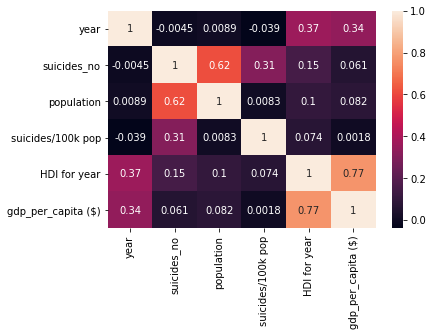

In [6]:
_ = sns.heatmap(df.corr(), annot=True)

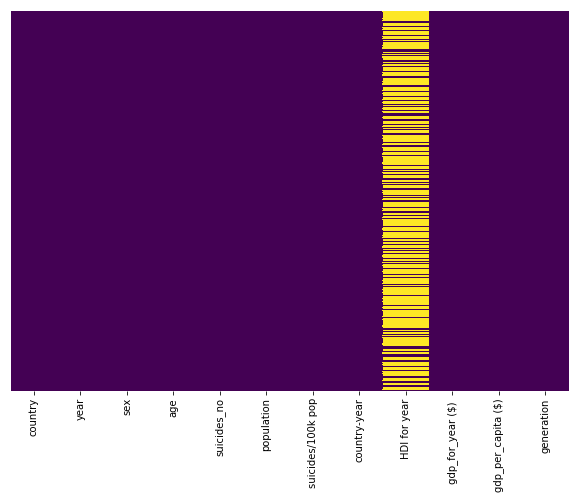

In [7]:
# checking null values
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

## Let's check top 10 country-age combination with highest suicide rates wise 

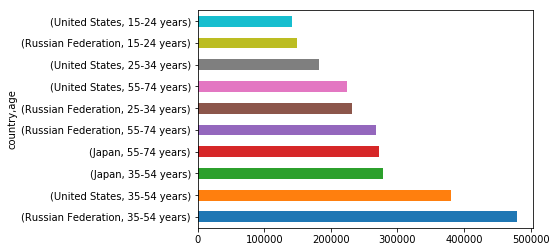

In [8]:
df.groupby(['country','age']).suicides_no.sum().nlargest(10).plot(kind='barh')


## We observe few things:


- We observe that people aged 35-54 in Russian Federation have highest number of suicides
- Whereas people aged 15-24 in United States have least number of sucides compared to others
- Also, top 3 highest suicides are from people aged 35-54

## Now let's check Male vs Female suicide rates grouped by age

/home/vikash/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


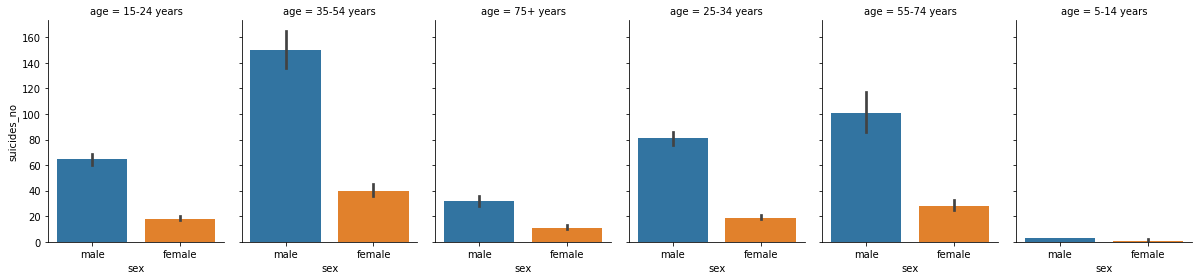

In [9]:
from numpy import median
ax = sns.catplot(x="sex", y="suicides_no",col='age', data=df, estimator=median,height=4, aspect=.7,kind='bar')

## Observation:
- Ok we observe that people aged 35-54 years have highest number of suicide rate. 
- Moreover, we observe that in age group male suiciders are more than female.
- Astonishing thing is, childen aged 5-14 have some bar too. Though it's least, but astonishing

# Now let's check the suicide rate grouped by year

/home/vikash/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


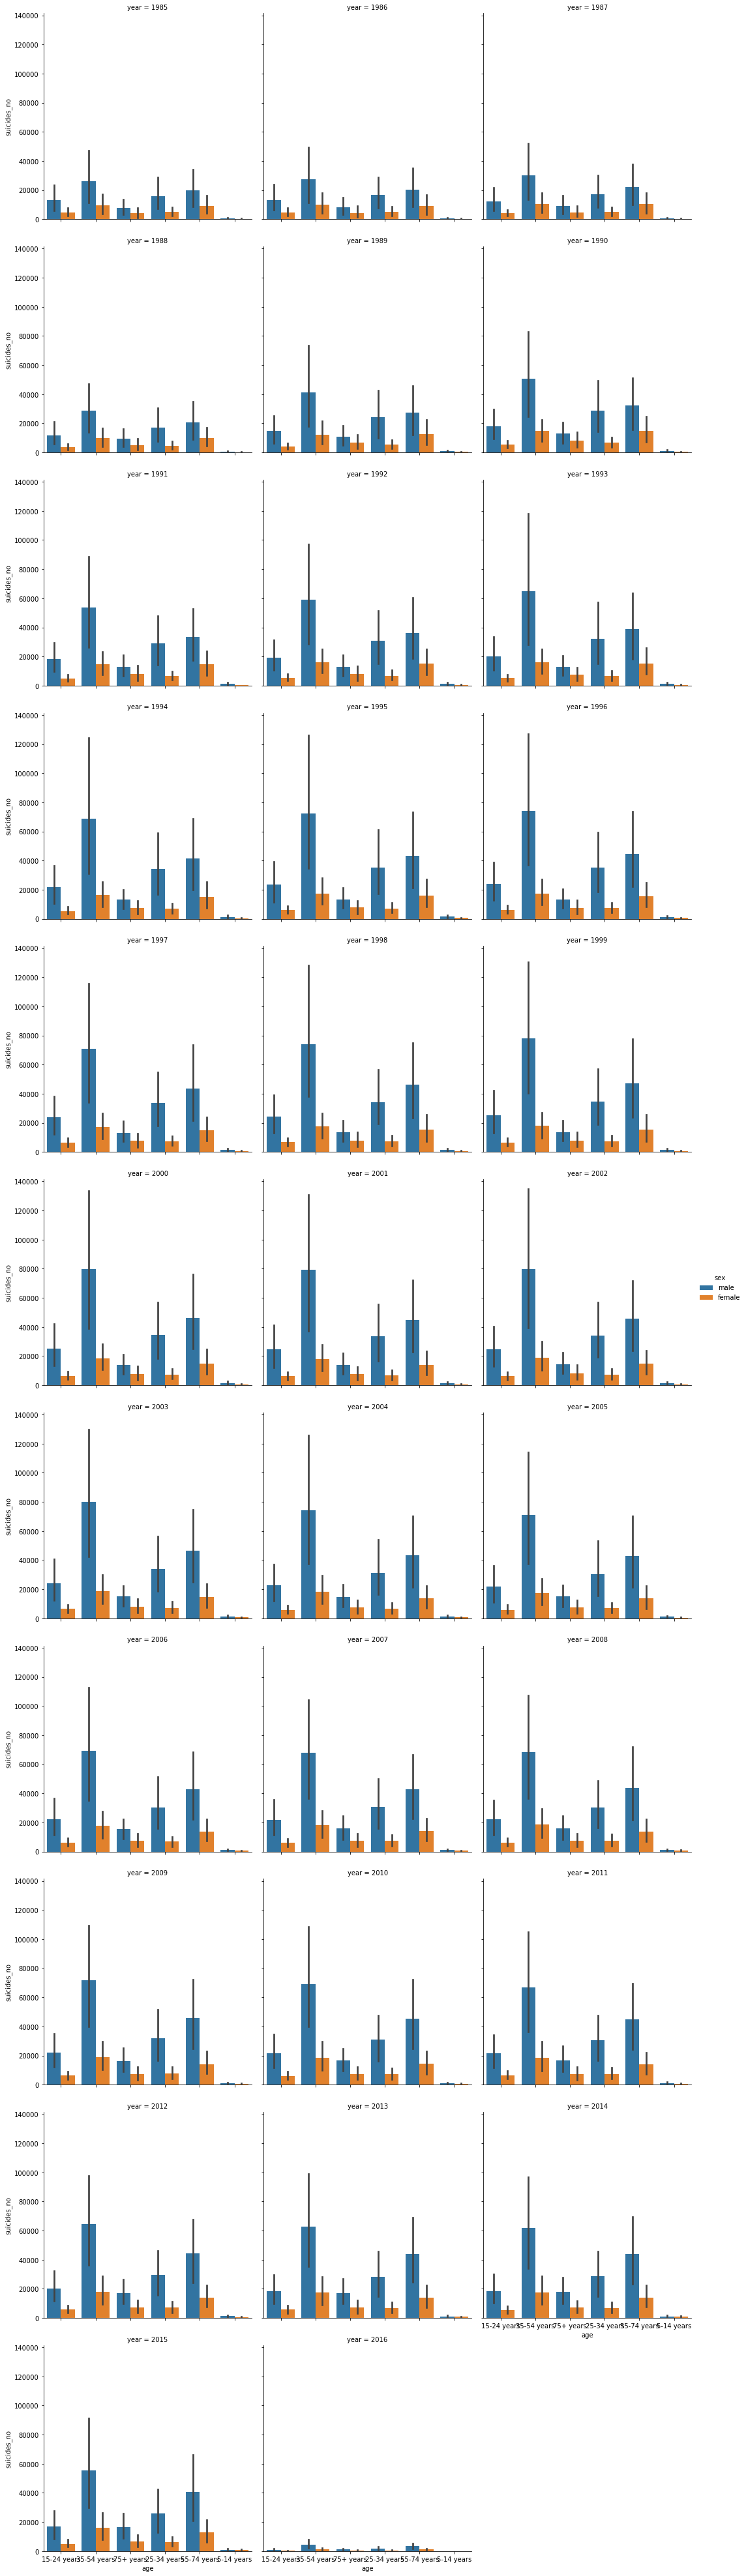

In [10]:
from numpy import sum
sns.catplot('age','suicides_no',hue='sex',col='year',data=df,kind='bar',col_wrap=3,estimator=sum)

## Observation
- grouped by age(irrespective of country) from 1985 to 2016, male suiciders are always way greater than female suicders in that age category
- Also, from this catplot we again see that people aged 35-54 years have highest suicide rates. This is a great observation and could be used to decrease or limit people from suiciding

## Let's observe the above catplot as line plot, which clearly gives comparision between different age group

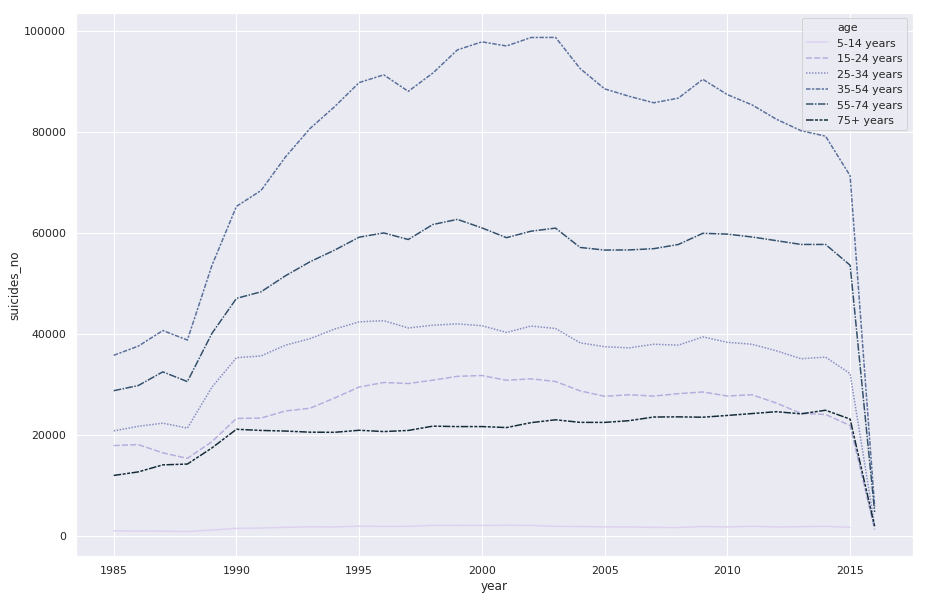

In [11]:
from matplotlib.colors import LogNorm
df1 = df.groupby(['year','age']).suicides_no.sum().reset_index()
df1['age'] = df1.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot('year','suicides_no',hue='age',style='age',data=df1,hue_norm=LogNorm(),palette="ch:2.5,.25",sort=False)

## Observation:
- Clearly we can see and rank suicide rates grouped by different age.
- 34-54 aged people may have certain health issue maybe because of some pressure,etc. And they suicide the most, starting from 1986 to 2016
- 75+ aged people have almost constant suicide rate, this maybe a reason that they no longer wanna live or they might suffer from disease etc., and they decide to end their life
- Other aged group are ranked as follows - 55-74 > 25-34 > 15-24

# We have done lots of visualisatoin grouping people by age. 
# Let's see how population affects suicide rates(male vs female)

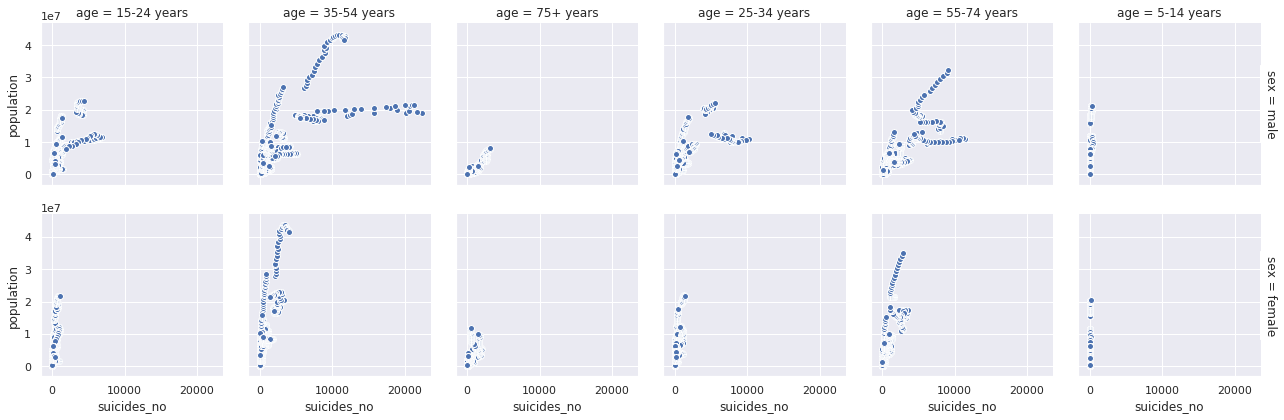

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

g = sns.FacetGrid(df, row="sex", col="age", margin_titles=True)

g.map(plt.scatter, "suicides_no","population", edgecolor="w")

### We observe that more the population, comparatively more is the suicide rate

## Let's check how generation effects suicides rate

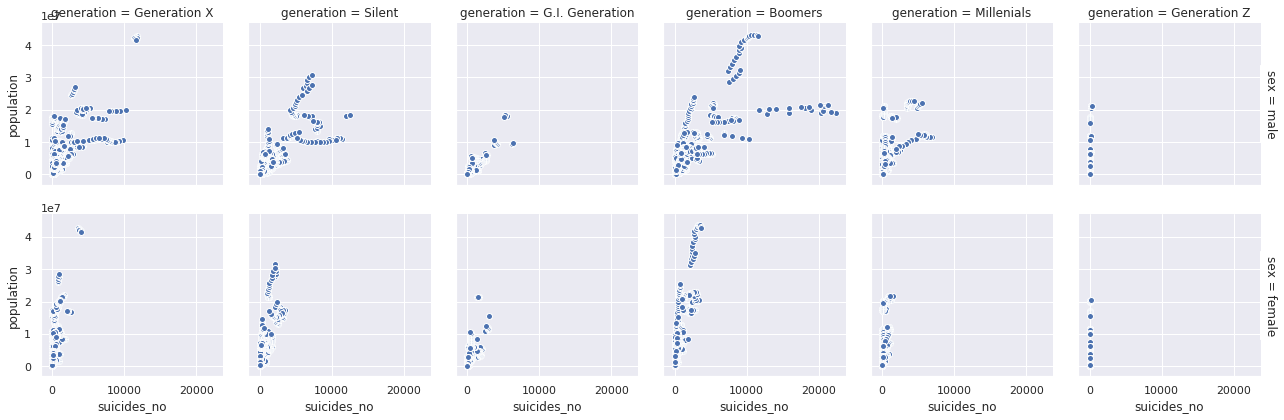

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

g = sns.FacetGrid(df, row="sex", col="generation", margin_titles=True)

g.map(plt.scatter, "suicides_no","population", edgecolor="w")

## We observe that
- Boomers(persons born between 1946 and 1964) have the highest suicide rate. 
- Silent(persons born between 1925 and 1945) have the second highest suicide rate
- These 2 generations are followed by Generation_x(1965-1979) and millenials(1980-1994)
- Generation Z has least(1995-2012)

- We see that suicide rate decreases among newer generation(this could also be a result of us not having much data for these generation)


## Total Overall Observation:
- People aged 35-54 has highest suicide rate. This age group is critical. People get responsibilities,etc
- Russia, US and Japan has the highest suicide rate, maybe because of their way of living, strict government rule, poverty, etc.
- Boomer generation(born 1946-64) shows highest siuicide rate(vs population)
- Also, more the population, more is the suicide rate.
- Old people suicide the least(maybe they just wait for natural death)